In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/K8 Reviews v0.2.csv")

In [3]:
df

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...
...,...,...
14670,1,"I really like the phone, Everything is working..."
14671,1,The Lenovo K8 Note is awesome. It takes best p...
14672,1,Awesome Gaget.. @ this price
14673,1,This phone is nice processing will be successf...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14675 entries, 0 to 14674
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  14675 non-null  int64 
 1   review     14675 non-null  object
dtypes: int64(1), object(1)
memory usage: 229.4+ KB


In [5]:
df.sentiment.value_counts()

0    7712
1    6963
Name: sentiment, dtype: int64

In [6]:
df.sentiment.value_counts(normalize=True).mul(100).round(2)

0    52.55
1    47.45
Name: sentiment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


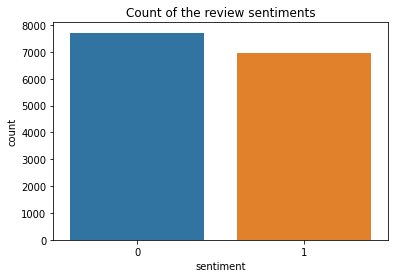

In [7]:
sns.countplot(df['sentiment'])
plt.title('Count of the review sentiments')
plt.show()

# 1. Normalize case

In [22]:
[i.lower() for i in df.review][14674]

'good product but the pakeging was not enough.'

In [23]:
norm_review = [i.lower() for i in df.review]

# Task 2. Tokenize (using word_tokenize from NLTK)

In [26]:
#Tokenizing 
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
token_review = [word_tokenize(i) for i in norm_review]
print(token_review)

[['good', 'but', 'need', 'updates', 'and', 'improvements'], ['worst', 'mobile', 'i', 'have', 'bought', 'ever', ',', 'battery', 'is', 'draining', 'like', 'hell', ',', 'backup', 'is', 'only', '6', 'to', '7', 'hours', 'with', 'internet', 'uses', ',', 'even', 'if', 'i', 'put', 'mobile', 'idle', 'its', 'getting', 'discharged.this', 'is', 'biggest', 'lie', 'from', 'amazon', '&', 'lenove', 'which', 'is', 'not', 'at', 'all', 'expected', ',', 'they', 'are', 'making', 'full', 'by', 'saying', 'that', 'battery', 'is', '4000mah', '&', 'booster', 'charger', 'is', 'fake', ',', 'it', 'takes', 'at', 'least', '4', 'to', '5', 'hours', 'to', 'be', 'fully', 'charged.do', "n't", 'know', 'how', 'lenovo', 'will', 'survive', 'by', 'making', 'full', 'of', 'us.please', 'don', ';', 't', 'go', 'for', 'this', 'else', 'you', 'will', 'regret', 'like', 'me', '.'], ['when', 'i', 'will', 'get', 'my', '10', '%', 'cash', 'back', '...', '.', 'its', 'already', '15', 'january..'], ['good'], ['the', 'worst', 'phone', 'everthe

# Task 3. POS tagging using the NLTK pos tagger

In [31]:
#nltk.download('averaged_perceptron_tagger')
pos_review = [nltk.pos_tag(i) for i in token_review]
print(pos_review[0])

[('good', 'JJ'), ('but', 'CC'), ('need', 'VBP'), ('updates', 'NNS'), ('and', 'CC'), ('improvements', 'NNS')]


## Task 4. For the topic model, we would want 

to include only nouns
 - First, find out all the POS tags that correspond to nouns
 - Limit the data to only terms with these tags


In [34]:
noun_review = []
for i in pos_review:
  noun_review.append([j for j in i if re.search("NN.+", j[1])])
noun_review[0]  

[('updates', 'NNS'), ('improvements', 'NNS')]

## Task  5. Lemmatize
 - you want different forms of the terms to be treated as one
 - don't worry about providing POS tag to lemmatizer for now

In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [40]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
lem_reviews = []
for i in noun_review:
  lem_reviews.append([lem.lemmatize(word[0]) for word in i])

In [42]:
lem_reviews[0]

['update', 'improvement']

In [68]:
#def word_lem(text):
#  return WordNetLemmatizer().lemmatize(text, pos='n')

# Task 6. Remove stop words and punctuation (if there are any at all after the POS tagging)

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [45]:
from string import punctuation
from nltk.corpus import stopwords
stop_nltk = stopwords.words("english")

In [46]:
stop_updated = stop_nltk + list(punctuation) + ["..!"] + [":)"]
reviews_sw_removed=[]
for sent in lem_reviews:
    reviews_sw_removed.append([term for term in sent if term not in stop_updated])

In [48]:
reviews_sw_removed[0]

['update', 'improvement']

## Task 7. Create a topic model using LDA on the cleaned up data with 12 topics
 - what is the coherence of the model?
 
 Use gensim for this task

In [49]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models import ldamodel

In [72]:
x = gensim.utils.simple_preprocess(df['review'][300])
print(x)

['it', 'was', 'launched', 'as', 'the', 'next', 'big', 'thing', 'in', 'budget', 'smartphones', 'and', 'claimed', 'to', 'have', 'the', 'best', 'camera', 'in', 'that', 'range', 'phone', 'is', 'ok', 'decent', 'battery', 'life', 'not', 'the', 'best', 'but', 'still', 'decent', 'camera', 'after', 'months', 'of', 'use', 'found', 'it', 'starts', 'to', 'hang', 'bit', 'but', 'guess', 'that', 'normal', 'with', 'low', 'budget', 'android', 'devices']


In [73]:
print(gensim.parsing.preprocessing.STOPWORDS)

frozenset({'elsewhere', 'below', 'when', 'your', 'enough', 'not', 'her', 'eleven', 'again', 'seems', 'really', 'throughout', 'then', 'each', 'too', 'detail', 'nine', 'take', 'until', 'seeming', 'they', 'mostly', 'thru', 'my', 'in', 'sometimes', 'side', 'through', 'doing', 're', 'now', 'toward', 'you', 'whereby', 'which', 'do', 'get', 'along', 'bill', 'fify', 'mill', 'forty', 'themselves', 'hundred', 'perhaps', 'under', 'could', 'five', 'him', 'those', 'although', 'thick', 'always', 'have', 'ours', 'became', 'hereby', 'some', 'moreover', 'this', 'someone', 'eg', 'call', 'meanwhile', 'together', 'that', 'where', 'cry', 'anywhere', 'everything', 'yours', 'out', 'hereupon', 'whether', 'it', 'go', 'i', 'cant', 'cannot', 'sixty', 'therein', 'many', 'can', 'hence', 'well', 'latterly', 'has', 'might', 'due', 'thereby', 'anything', 'onto', 'whoever', 'there', 'himself', 'fifteen', 'four', 'regarding', 'everyone', 'what', 'been', 'almost', 'an', 'part', 'only', 'whose', 'myself', 'twenty', 'to',

### All preprocess steps done by small code

In [50]:
def preprocess(text):
  result=[]
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token)>3:
      result.append(WordNetLemmatizer().lemmatize(token, pos='n'))
  return result 

In [51]:
print(preprocess(df['review'][300]))

['launched', 'thing', 'budget', 'smartphones', 'claimed', 'best', 'camera', 'range', 'phone', 'decent', 'battery', 'life', 'best', 'decent', 'camera', 'month', 'start', 'hang', 'guess', 'normal', 'budget', 'android', 'device']


In [52]:
preprocessed_reviews = []
for i in df.review:
  preprocessed_reviews.append(preprocess(i))

In [54]:
print(preprocessed_reviews[:10])

[['good', 'need', 'update', 'improvement'], ['worst', 'mobile', 'bought', 'battery', 'draining', 'like', 'hell', 'backup', 'hour', 'internet', 'us', 'mobile', 'idle', 'getting', 'discharged', 'biggest', 'amazon', 'lenove', 'expected', 'making', 'saying', 'battery', 'booster', 'charger', 'fake', 'take', 'hour', 'fully', 'charged', 'know', 'lenovo', 'survive', 'making', 'regret', 'like'], ['cash', 'january'], ['good'], ['worst', 'phone', 'everthey', 'changed', 'phone', 'problem', 'amazon', 'returning', 'phone', 'highly', 'disappointing', 'amazon'], ['telling', 'buyi', 'totally', 'batterypoor', 'camerawaste', 'money'], ['phone', 'awesome', 'charging', 'heat', 'allot', 'genuine', 'reason', 'hate', 'lenovo', 'note'], ['battery', 'level', 'worn'], ['hitting', 'problem', 'phone', 'hanging', 'problem', 'lenovo', 'note', 'service', 'station', 'ahmedabad', 'year', 'warranty', 'change', 'phone', 'lenovo'], ['glitch', 'dont', 'thing', 'better', 'option']]


In [55]:
dictionary = gensim.corpora.Dictionary(preprocessed_reviews)

In [81]:
dictionary.keys()[:5]

[0, 1, 2, 3, 4]

In [82]:
#print a few words in the dictionary
count = 0
for a,b in dictionary.iteritems():
    print(a,b)
    count = count + 1
    if count > 7:
        break

0 good
1 improvement
2 need
3 update
4 amazon
5 backup
6 battery
7 biggest


In [83]:
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_reviews]

In [84]:
print(bow_corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1)], [(4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 2), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(34, 1), (35, 1)], [(0, 1)], [(4, 2), (33, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1)], [(43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)], [(24, 1), (40, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1)], [(6, 1), (57, 1), (58, 1)], [(24, 2), (40, 2), (41, 2), (55, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1)], [(67, 1), (68, 1), (69, 1), (70, 1), (71, 1)], [(72, 1)], [(0, 1), (11, 1), (40, 1), (73, 1), (74, 1), (75, 1)], [(6, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1)], [(6, 1), (27, 1), (33, 1), (41, 2), (74, 1), (78, 1), (81, 1), (82, 1)], [(0, 3), (5, 1), (40, 1), (83, 1), (84, 1), (85, 1), (86, 1)

In [85]:
#apply the gensim LDA model and generate 4 topics from the corpus
gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=42,
                                           passes=10,
                                           per_word_topics=True)

In [86]:
pprint(lda_model.print_topics())

[(0,
  '0.071*"awesome" + 0.044*"note" + 0.039*"performance" + 0.035*"great" + '
  '0.027*"feature" + 0.023*"overall" + 0.022*"superb" + 0.021*"dual" + '
  '0.021*"backup" + 0.018*"mode"'),
 (1,
  '0.125*"quality" + 0.104*"worst" + 0.069*"poor" + 0.049*"amazon" + '
  '0.024*"performance" + 0.021*"return" + 0.017*"sound" + 0.012*"picture" + '
  '0.011*"thanks" + 0.011*"company"'),
 (2,
  '0.034*"getting" + 0.021*"heated" + 0.020*"expected" + 0.020*"earphone" + '
  '0.019*"get" + 0.016*"signal" + 0.014*"performance" + 0.013*"heat" + '
  '0.013*"poor" + 0.012*"call"'),
 (3,
  '0.078*"charging" + 0.056*"charge" + 0.052*"charger" + 0.047*"hour" + '
  '0.043*"turbo" + 0.042*"fast" + 0.030*"time" + 0.029*"drain" + 0.024*"take" '
  '+ 0.023*"working"'),
 (4,
  '0.037*"feature" + 0.037*"screen" + 0.034*"option" + 0.030*"like" + '
  '0.025*"note" + 0.021*"available" + 0.021*"cast" + 0.018*"missing" + '
  '0.018*"recording" + 0.016*"contact"'),
 (5,
  '0.137*"problem" + 0.122*"heating" + 0.093*"i

In [87]:
'''
For each topic, explore each word and its relative weight in the topic
'''

for idx,topic in lda_model.print_topics(-1,num_words=15):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.071*"awesome" + 0.044*"note" + 0.039*"performance" + 0.035*"great" + 0.027*"feature" + 0.023*"overall" + 0.022*"superb" + 0.021*"dual" + 0.021*"backup" + 0.018*"mode" + 0.017*"better" + 0.017*"mark" + 0.016*"love" + 0.015*"depth" + 0.015*"rear"


Topic: 1 
Words: 0.125*"quality" + 0.104*"worst" + 0.069*"poor" + 0.049*"amazon" + 0.024*"performance" + 0.021*"return" + 0.017*"sound" + 0.012*"picture" + 0.011*"thanks" + 0.011*"company" + 0.010*"display" + 0.009*"speed" + 0.009*"nahi" + 0.009*"image" + 0.009*"want"


Topic: 2 
Words: 0.034*"getting" + 0.021*"heated" + 0.020*"expected" + 0.020*"earphone" + 0.019*"get" + 0.016*"signal" + 0.014*"performance" + 0.013*"heat" + 0.013*"poor" + 0.012*"call" + 0.011*"time" + 0.010*"internet" + 0.010*"disappointed" + 0.010*"data" + 0.010*"minute"


Topic: 3 
Words: 0.078*"charging" + 0.056*"charge" + 0.052*"charger" + 0.047*"hour" + 0.043*"turbo" + 0.042*"fast" + 0.030*"time" + 0.029*"drain" + 0.024*"take" + 0.023*"working" + 0.021

In [91]:
#import Coherence model from gensim
from gensim.models import CoherenceModel
#compute coherence score
lda_model_coherence = CoherenceModel(model=lda_model,texts=preprocessed_reviews,dictionary=dictionary,
                                    coherence='c_v')
coherence_lda = lda_model_coherence.get_coherence()
print('\nCoherence Score:',coherence_lda)


Coherence Score: 0.5134356725893802


### Task 8. Analyze the topics, which pairs of topics can be combined?
 - you can assume that if a pair of topics has very similar top terms, they are very close and can be combined

In [ ]:
## Pair of topics that similar terms
** Topic 0,7,9 and 10 possibly talks about 'performance'
Topic 3 &5 closely talks about 'battery related issues'
Topic 4 and 8 vaguely talks about 'Screen'**


# Task 9. Create topic model using LDA with what you think is the optimal number of topics

 . is the coherence better now?

In [93]:
# Build LDA model
lda_model8 = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=8, 
                                           random_state=42,
                                           passes=10,
                                           per_word_topics=True)

In [96]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model8, texts=preprocessed_reviews, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.5807629234493668


# Task 10. The business finally needs to be able to interpret the topics
name each of the identified topics
create a table with the topic name and the top 10 terms in each to present to business

In [97]:
x = lda_model8.show_topics(formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

In [98]:
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

0::['phone', 'problem', 'issue', 'network', 'month', 'lenovo', 'time', 'getting', 'heating', 'service']
1::['mobile', 'working', 'good', 'properly', 'super', 'cool', 'getting', 'fine', 'heat', 'auto']
2::['money', 'camera', 'waste', 'dolby', 'value', 'quality', 'sound', 'worth', 'video', 'playing']
3::['good', 'phone', 'camera', 'nice', 'battery', 'price', 'best', 'quality', 'awesome', 'performance']
4::['phone', 'lenovo', 'note', 'update', 'screen', 'option', 'like', 'feature', 'software', 'work']
5::['battery', 'charging', 'heating', 'fast', 'phone', 'problem', 'issue', 'charge', 'hour', 'charger']
6::['poor', 'worst', 'battery', 'quality', 'camera', 'phone', 'speaker', 'working', 'performance', 'earphone']
7::['product', 'lenovo', 'note', 'amazon', 'good', 'return', 'delivery', 'service', 'better', 'worst']



In [37]:
#possible topics from terms present

#Topic0 = issues
#Topic1 = mobile working condition
#Topic2 = Quality
#Topic3 = phone performance
#Topic4 = update
#Topic5 = battery related issues
#Topic6 = camera quality
#Topic7 = Amazon service